**Made by - Rishabh Gupta**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#!pip install xgboost

from sklearn.model_selection import train_test_split
#linear regression_model
from sklearn.linear_model import LinearRegression
#model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
try:
    import xgboost
    print("XGBoost is installed.")
except ImportError:
    print("XGBoost is not installed. You can install it using pip:")
    print("pip install xgboost")

XGBoost is installed.


In [3]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

from xgboost import XGBClassifier

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

In [4]:
data_main = pd.read_csv('C:/Users/risha/Downloads/EasyVisa.csv')

In [5]:
data = data_main.copy()

In [6]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [9]:
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.00000,NaN,NaN,NaN,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,NaN,NaN,NaN,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.00000,NaN,NaN,NaN,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [11]:
# Dropping case_id column as it is a unique identifier and not contribute to the predictive modeling
data.drop("case_id", axis=1, inplace=True)

In [12]:
data[data.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [13]:
# Identify the number of rows where no_of_employees has negative values
data.loc[data['no_of_employees'] < 0].shape

(33, 11)

In [14]:
data['no_of_employees'] = abs(data['no_of_employees'])

In [15]:
# Checking the count of each unique category in the categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

<Figure size 1400x1000 with 0 Axes>

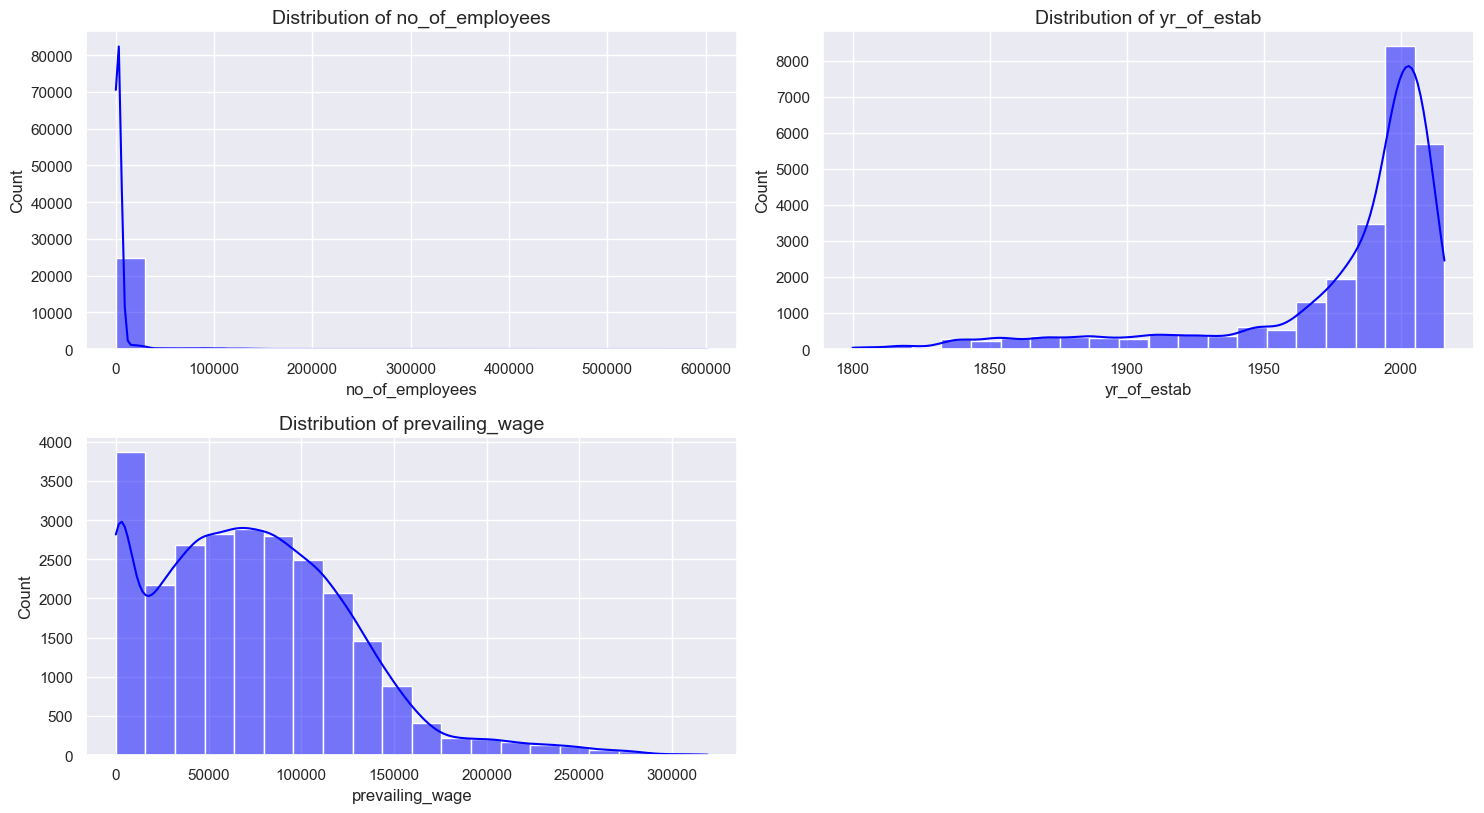

In [16]:
columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']



# Setting up the figure and axes for multiple subplots
plt.figure(figsize=(14, 10))

# Set up a 5x2 grid for 10 subplots
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns of subplots
    sns.histplot(data[column], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {column}', fontsize=14)

plt.tight_layout()
plt.show()

In [20]:
import matplotlib.colors as mcolors

def hist_and_boxplot(data, variable, figsize=(12, 7), kde=False, bins=None):

    # Set up the matplotlib figure with two rows and one column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [0.25, 0.75]})

    # Set an appealing background color
    fig.patch.set_facecolor('whitesmoke')
    sns.set_style('whitegrid')
    
    # Plot the boxplot on the first row with a gradient-like color
    box_color = sns.light_palette("royalblue", reverse=True)[3]
    sns.boxplot(x=variable, data=data, ax=ax1, showmeans=True, meanline=True, 
                meanprops={"color": "orange", "ls": "--", "lw": 2},
                medianprops={"color": "black", "lw": 2},
                flierprops={"markerfacecolor": "red", "marker": "o"},
                color=box_color)
    ax1.set(xlabel='', title=f'Boxplot and Distribution of {variable}')
    ax1.set_facecolor('whitesmoke')
    
    # Plot the histogram on the second row with a gradient fill
    hist_color = sns.light_palette("green", reverse=False)[2]
    if bins:
        sns.histplot(data[variable], kde=kde, bins=bins, ax=ax2, color=hist_color, edgecolor="black", alpha=0.7)
    else:
        sns.histplot(data[variable], kde=kde, ax=ax2, color=hist_color, edgecolor="black", alpha=0.7)
    
    # Draw lines for mean and median with enhanced styling
    mean_val = data[variable].mean()
    median_val = data[variable].median()
    ax2.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax2.axvline(median_val, color='purple', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Add legend with a light background
    legend = ax2.legend()
    legend.get_frame().set_facecolor('lightgrey')
    legend.get_frame().set_edgecolor('black')

    # Set axis background colors
    ax2.set_facecolor('whitesmoke')
    ax1.grid(alpha=0.6)
    ax2.grid(alpha=0.6)

    plt.tight_layout()
    plt.show()


In [21]:
# Get a list of the numerical variables
num_var = data.select_dtypes(include=['int64', 'float64']).columns
print(num_var)

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


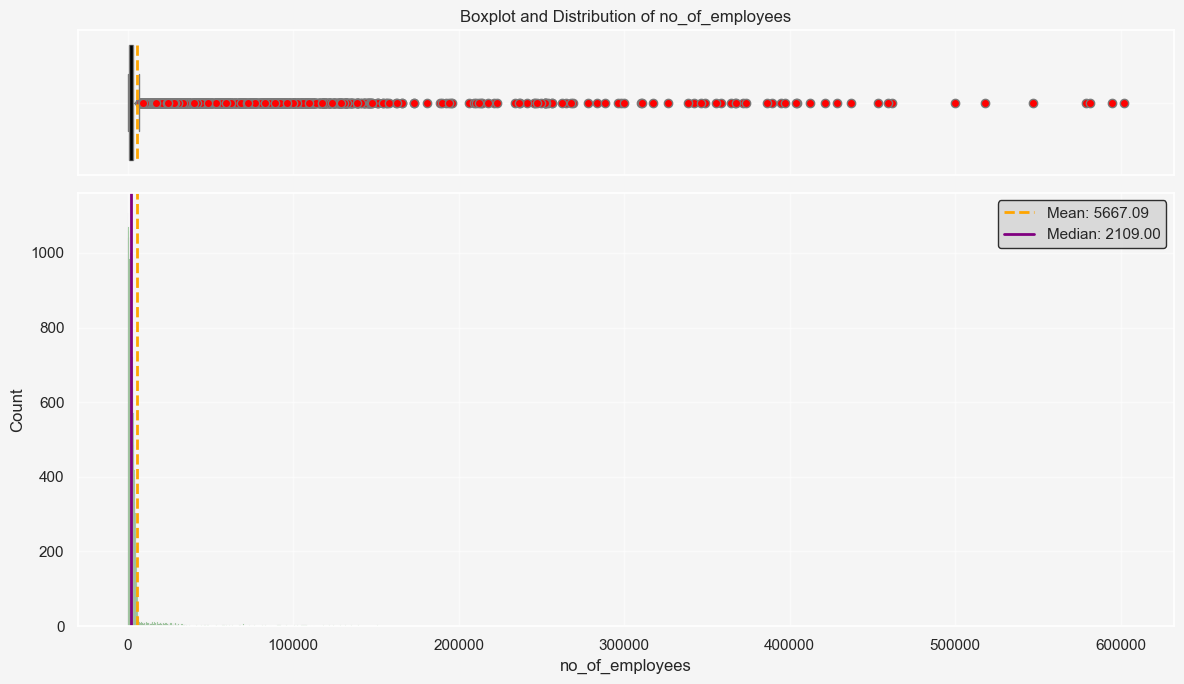

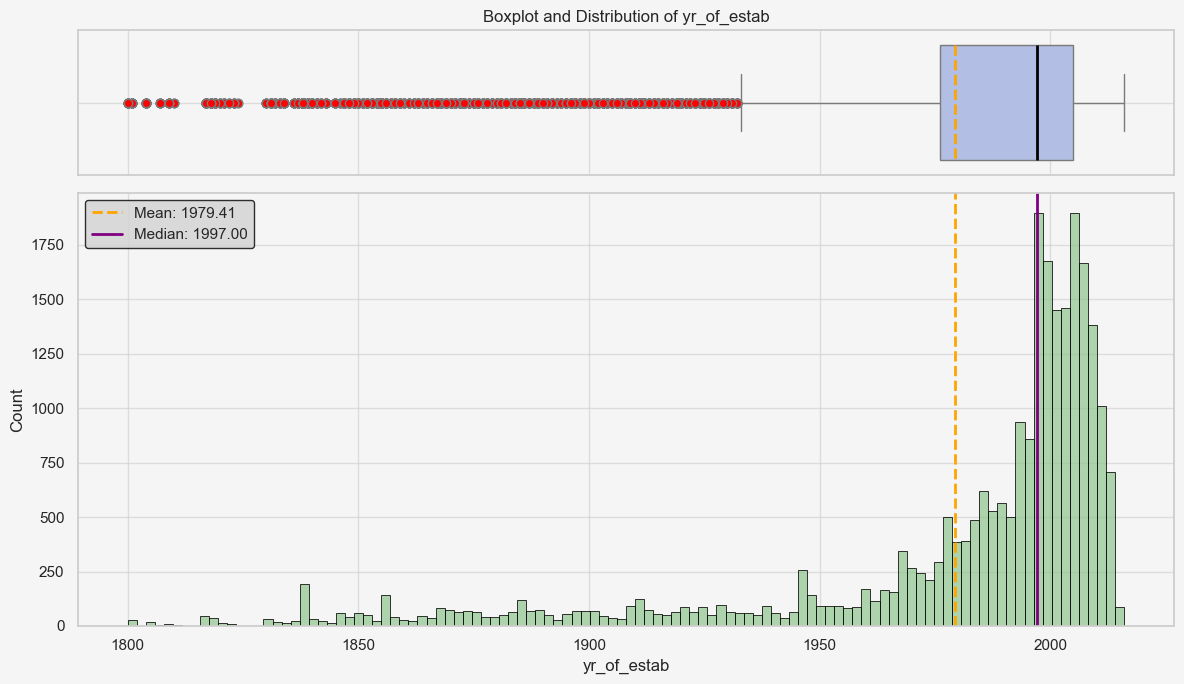

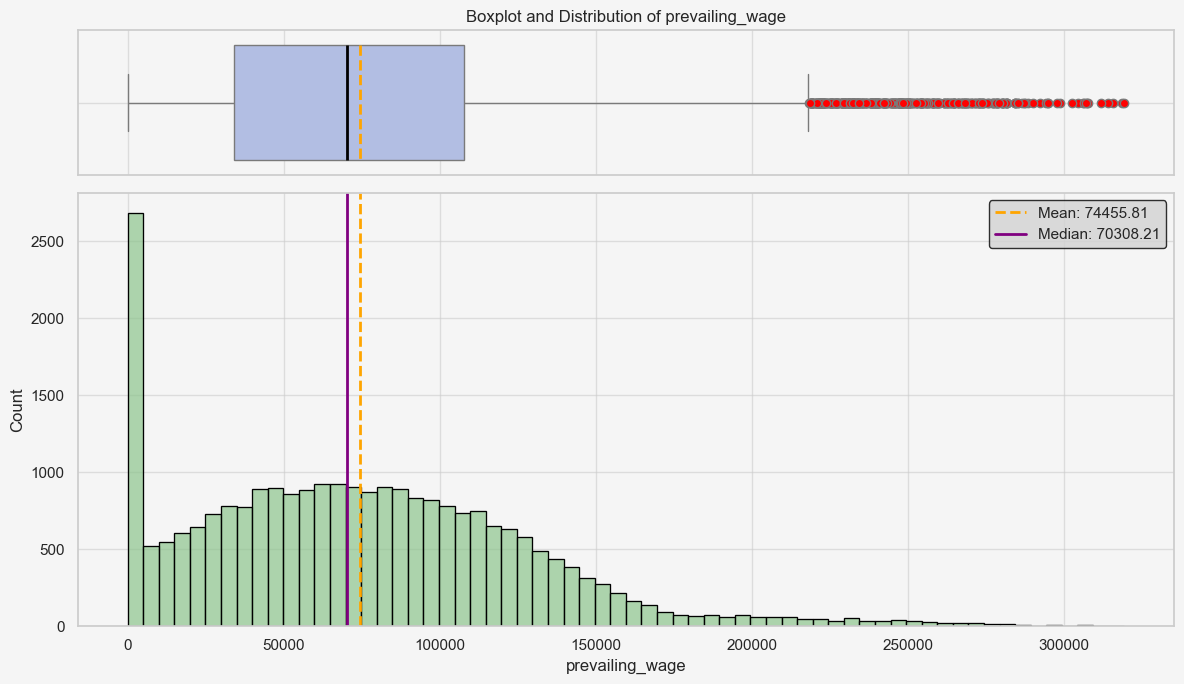

In [22]:
# Plot all the numerical variables in the data DataFrame
numerical_variables = [
   'no_of_employees',
   'yr_of_estab',
   'prevailing_wage'
    ]

# Looping through the list and creating a histogram and boxplot for each variable
for variable in numerical_variables:
   hist_and_boxplot(data, variable)

In [26]:

def custom_barplot(data, feature, perc=False, top_n=None, palette='coolwarm', bar_edge_color='black'):
    total_entries = len(data[feature])  # Total number of entries
    category_counts = data[feature].value_counts()

    # Determine the figure size based on the number of categories
    fig_width = min(max(8, (top_n + 2) if top_n else (category_counts.size + 2)), 16)
    plt.figure(figsize=(fig_width, 6))

    # Create the bar plot with specified palette and edge color
    category_order = category_counts.index[:top_n] if top_n is not None else category_counts.index
    barplot = sns.countplot(
        x=feature, 
        data=data, 
        order=category_order, 
        palette=palette, 
        edgecolor=bar_edge_color
    )

    # Add data labels to each bar with enhanced formatting
    for bar in barplot.patches:
        label_x_pos = bar.get_x() + bar.get_width() / 2
        if perc:
            label = f"{100 * bar.get_height() / total_entries:.1f}%"
        else:
            label = f"{bar.get_height()}"
        barplot.annotate(
            label,
            (label_x_pos, bar.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            color='darkblue',
            textcoords='offset points',
            xytext=(0, 5),  # Offset for better readability
            weight='bold'
        )

    # Rotate x-axis labels if there are many categories for improved visibility
    if category_counts.size > 8:
        plt.xticks(rotation=45, ha='right')

    # Adding a title and additional axes labels for better context
    plt.title(f'Distribution of {feature}', fontsize=16, weight='bold')
    plt.xlabel(feature.capitalize(), fontsize=13)
    plt.ylabel('Count' if not perc else 'Percentage', fontsize=13)

    # Adding a grid for visual separation
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.show()


In [27]:
# Get a list of categorical variables
cat_var = data.select_dtypes(include=['object']).columns
print(cat_var)

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


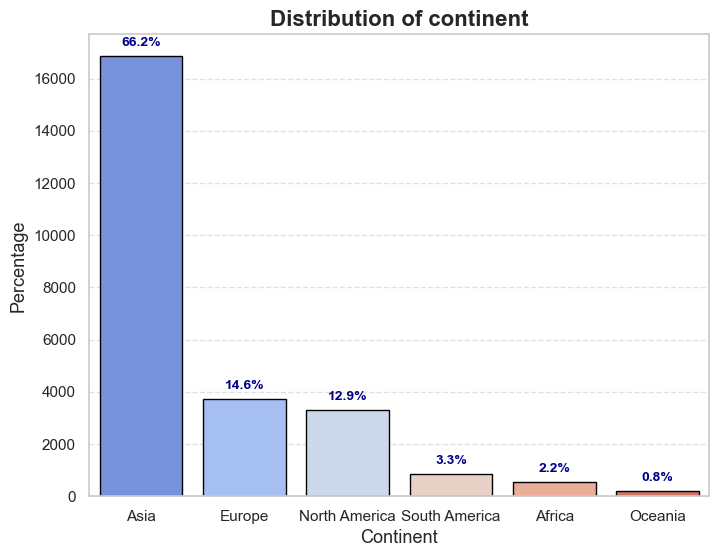

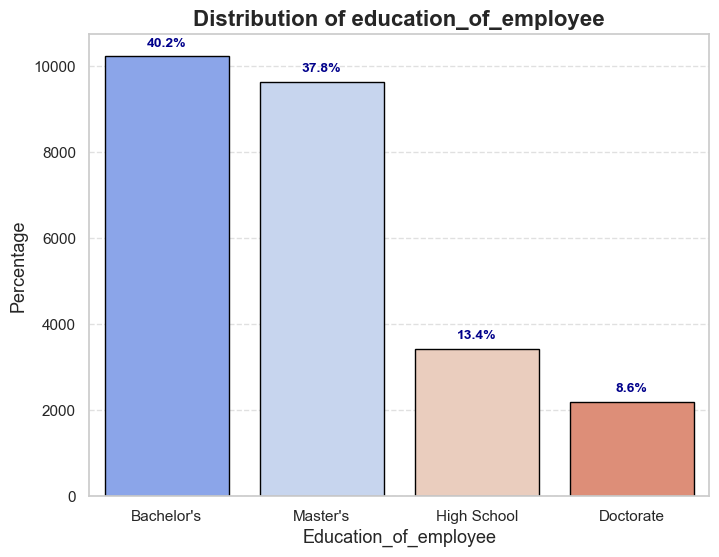

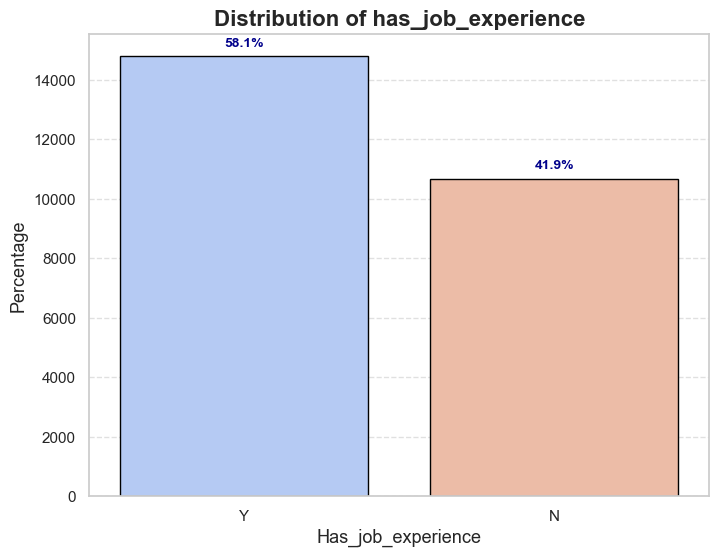

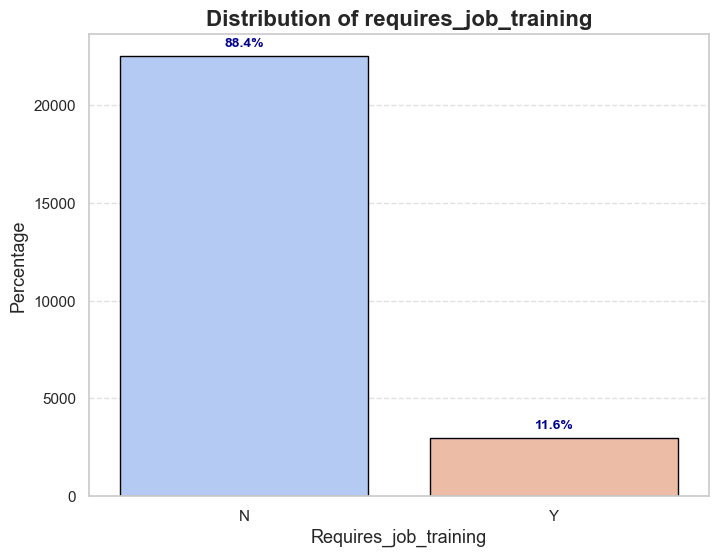

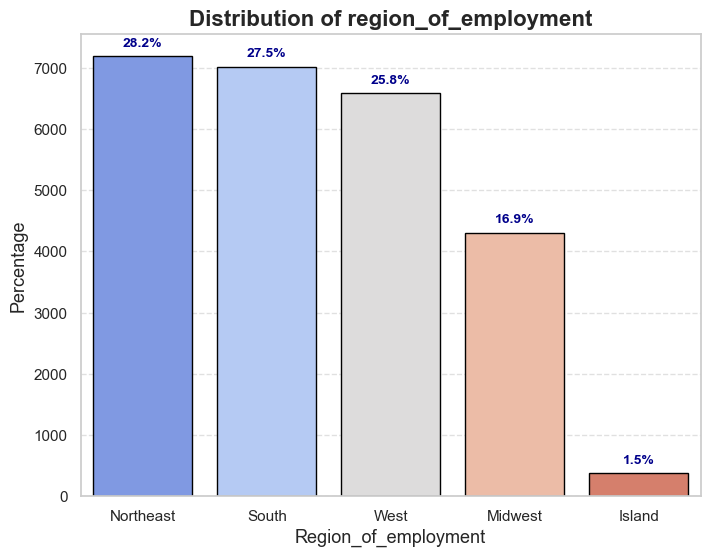

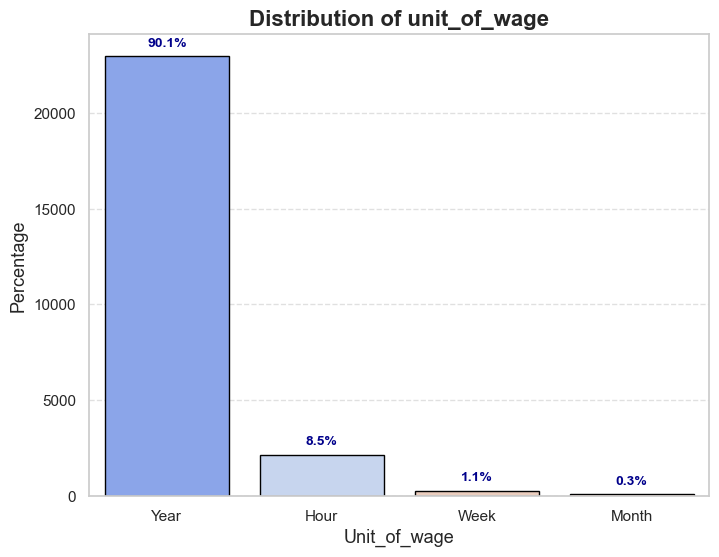

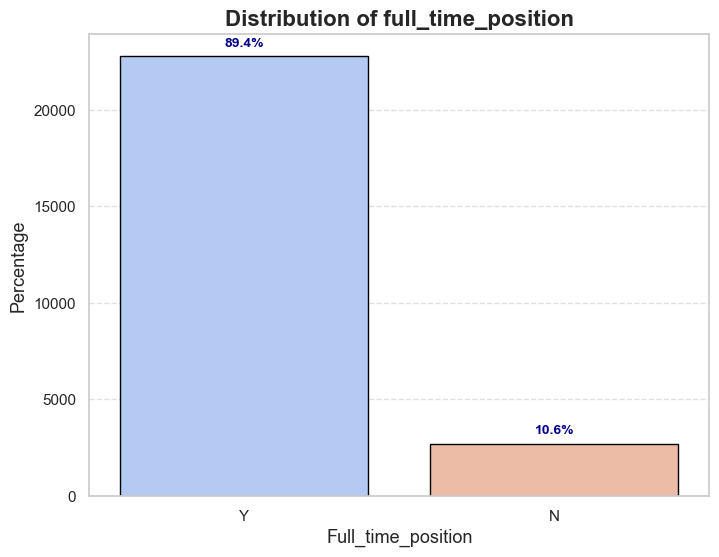

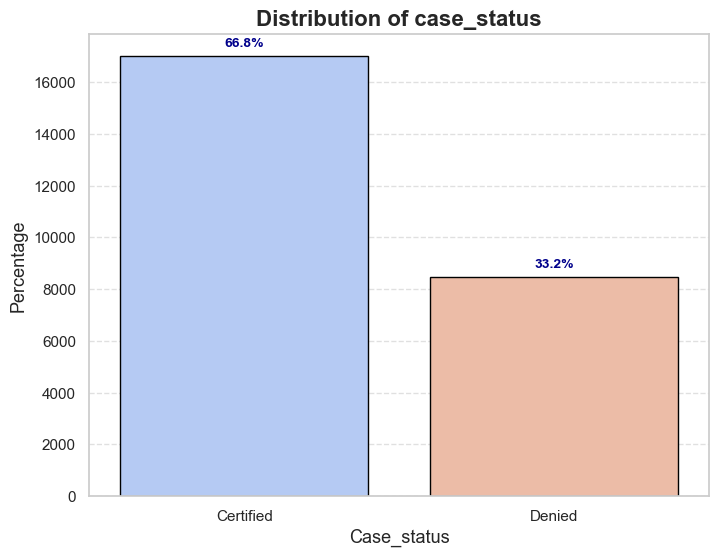

In [28]:
# List of categorical variables in the data DataFrame
categorical_variables = [
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'
  ]

# Looping through the list and creating a custom barplot for each variable
for variable in categorical_variables:
    custom_barplot(data, variable, perc=True)

In [30]:
colors = ["#1c5d99", "#4884AF", "#79ABC9", "#B3CEDE", "#DAE6F1"]

def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    target_uniq = data[target].unique()

    # For the histograms, alternate between the first two colors for the two unique targets
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=colors[0],  # Changed color
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=colors[2],  # Changed color
        stat="density",
    )
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette='Blues_r' # Changed palette
    )
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
     x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='Blues_r'  # Changed palette
    )
    plt.tight_layout()
    plt.show()

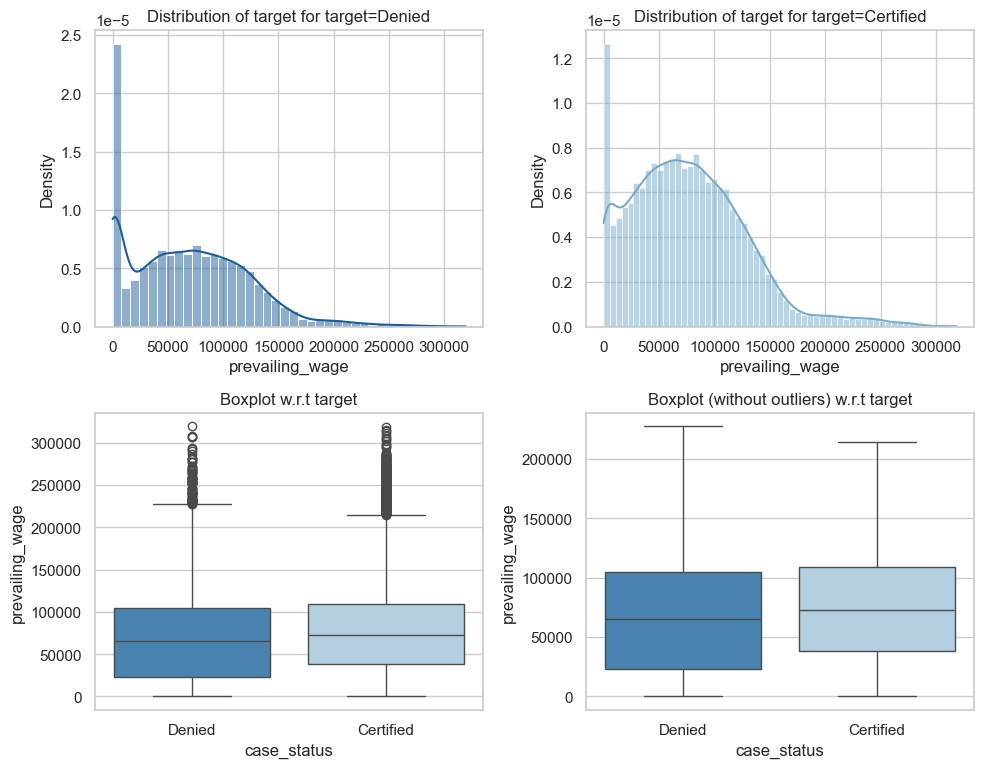

In [31]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

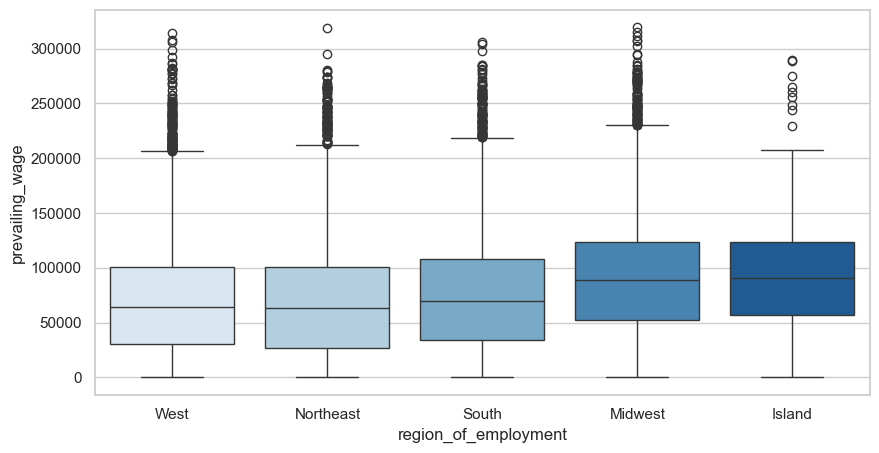

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", palette='Blues')
plt.show()

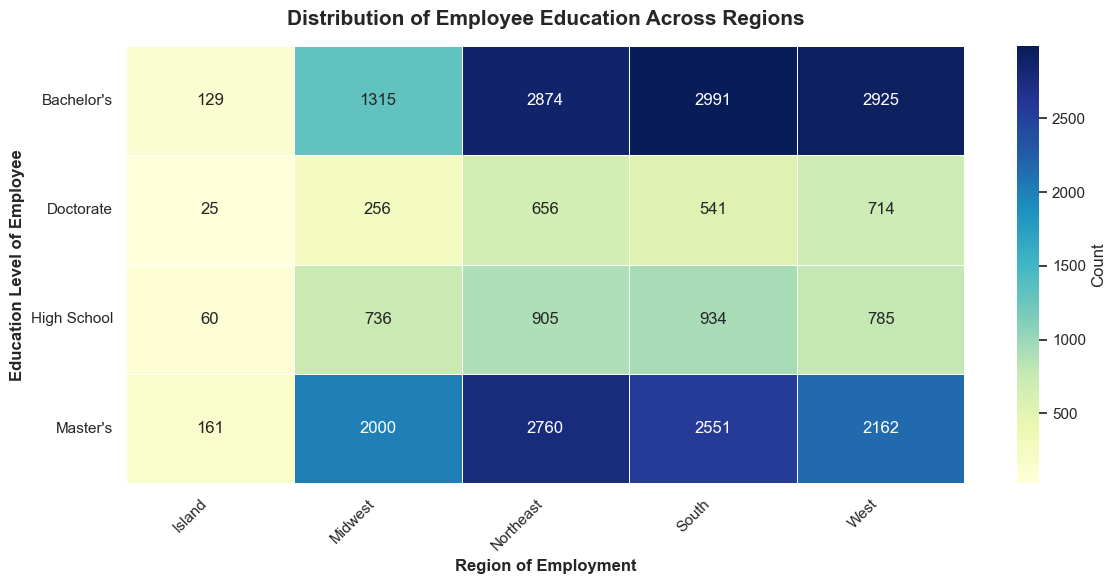

In [32]:
plt.figure(figsize=(12, 6))

# Creating a heatmap with a vibrant palette and better labels
heatmap = sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap='YlGnBu',  # More colorful palette
    linewidths=.5,  # Adding cell dividers
    linecolor='white',  # Divider color for clarity
    cbar_kws={'label': 'Count'}  # Adding a color bar label
)

# Adding more descriptive axis labels and title
heatmap.set_title('Distribution of Employee Education Across Regions', fontsize=15, pad=15, weight='bold')
heatmap.set_ylabel("Education Level of Employee", fontsize=12, weight='bold')
heatmap.set_xlabel("Region of Employment", fontsize=12, weight='bold')

plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.yticks(rotation=0)  # Keeping y-axis labels horizontal for clarity
plt.tight_layout()  # Optimizing layout for better presentation

plt.show()


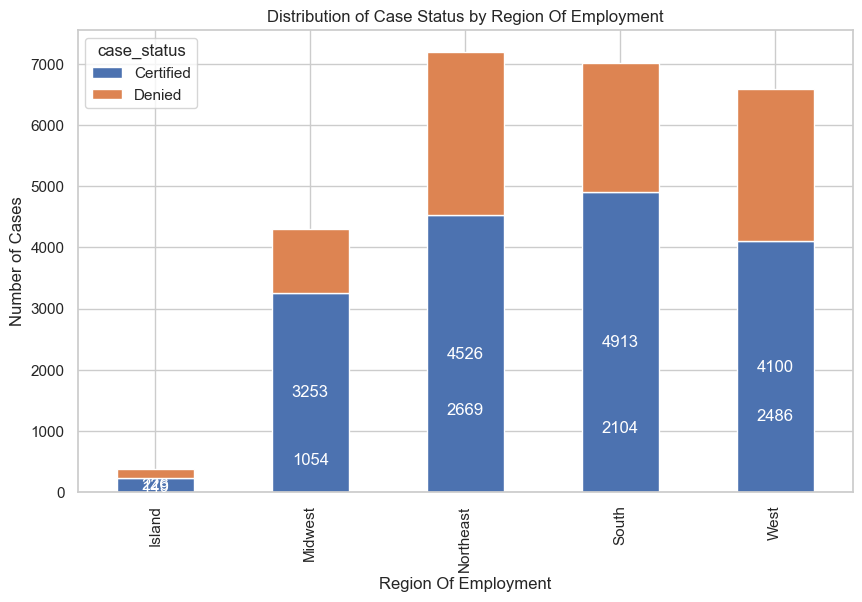

In [33]:
def stacked_barplot(data, x_var, y_var):

    # Calculate the counts for each combination of x_var and y_var
    counts = data.groupby([x_var, y_var]).size().unstack()

    # Create the stacked bar plot
    counts.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set the title and axis labels
    plt.title(f'Distribution of Case Status by {x_var.replace("_", " ").title()}')
    plt.xlabel(x_var.replace("_", " ").title())
    plt.ylabel('Number of Cases')

    # Add labels to the bars
    for i in range(len(counts.index)):
        for j in range(counts.shape[1]):
            plt.text(i, counts.iloc[i, j] / 2, str(counts.iloc[i, j]), ha='center', va='center', color='white')

    plt.show()

# Example usage:
stacked_barplot(data, "region_of_employment", "case_status")

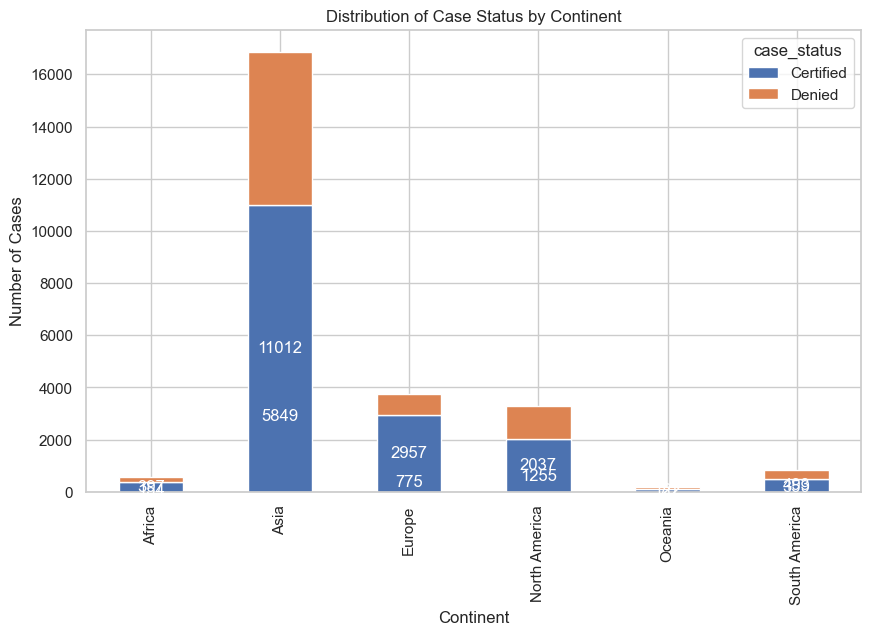

In [34]:
stacked_barplot(data, "continent", "case_status")

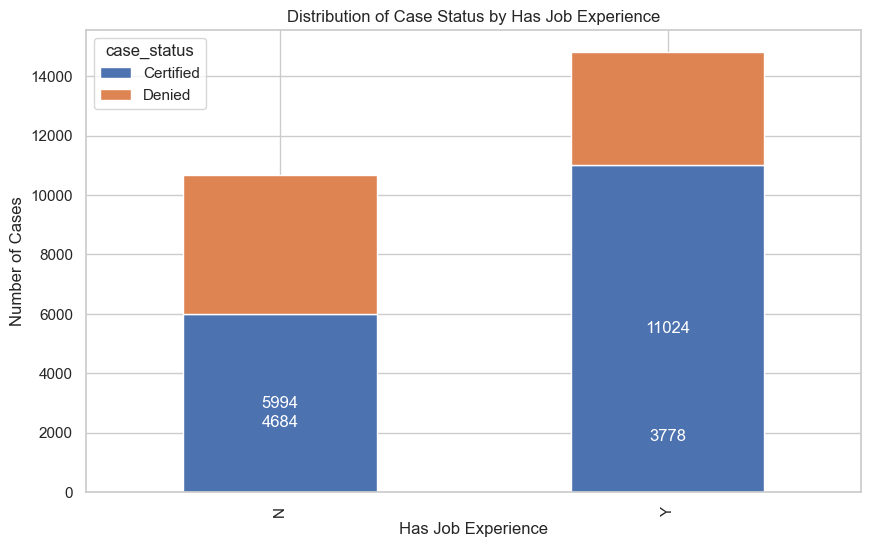

In [35]:
stacked_barplot(data, "has_job_experience", "case_status")

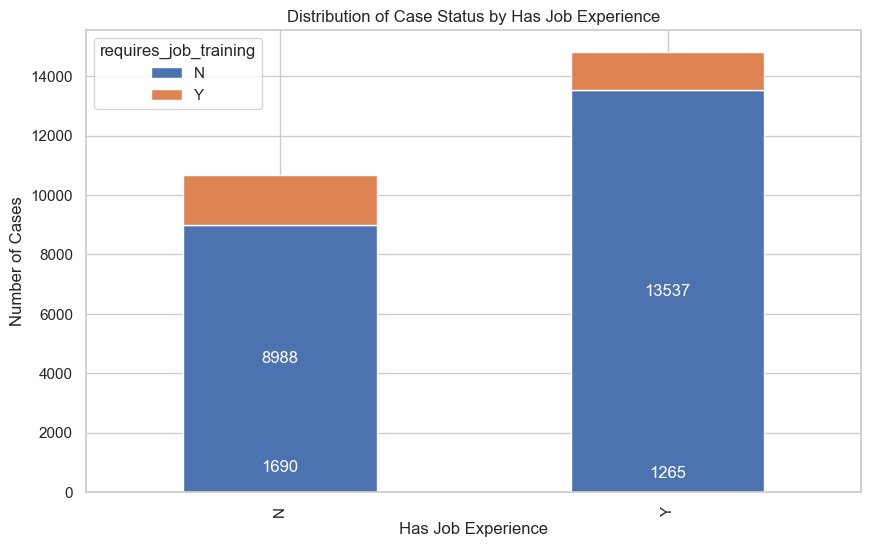

In [36]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

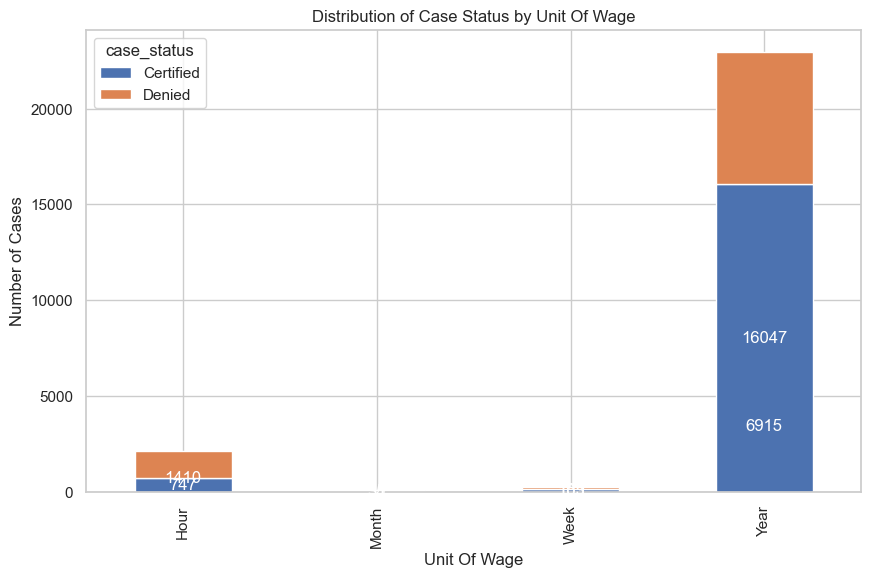

In [40]:
stacked_barplot(data, "unit_of_wage", "case_status")

**Data preprocessing -**

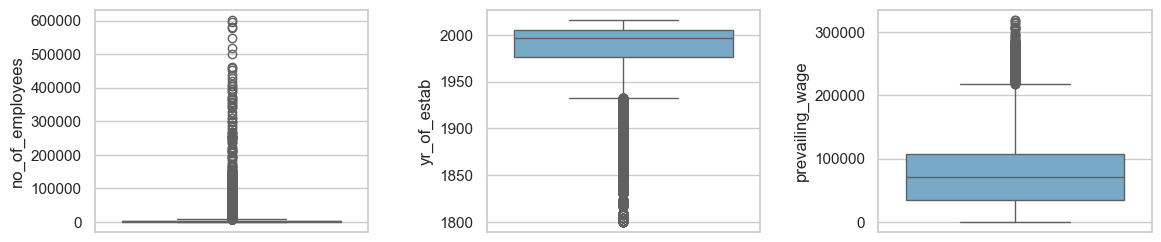

In [41]:
# Outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(16, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data,y=variable, palette='Blues')
    plt.tight_layout(pad=2)

plt.show()

**Data modelling -**

In [43]:
# Encode case status, where certified is 1, denied is 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Drop the target variable and create dummy variables
X = pd.get_dummies(data.drop(["case_status"], axis=1), drop_first=True)
Y = data["case_status"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

# Print the shapes and class distributions
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1   0.66792
0   0.33208
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1   0.66784
0   0.33216
Name: proportion, dtype: float64


In [44]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [45]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Decision Tree - Model Building and Hyperparameter Tuning**

In [46]:
# Define decision tree classifier with random state = 1
dt = DecisionTreeClassifier(random_state=1)
# Fit decision tree classifier on the train data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


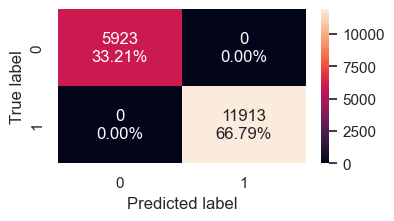

In [50]:
#Checking model performance on training set

# Create a confusion matrix for train data
confusion_matrix_sklearn(dt, X_train, y_train)

# Check performance for train data
dt_perf_train = model_performance_classification_sklearn(
    dt, X_train, y_train
)
dt_perf_train

,Accuracy,Recall,Precision,F1
0,0.66484,0.74280,0.75223,0.74749


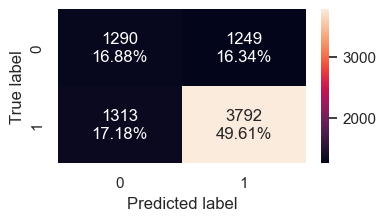

In [51]:
#Checking model performance on test set

# Create a confusion matrix for train data
confusion_matrix_sklearn(dt, X_test, y_test)

# Check performance for test data
dt_perf_test = model_performance_classification_sklearn(
    dt, X_test, y_test
)
dt_perf_test


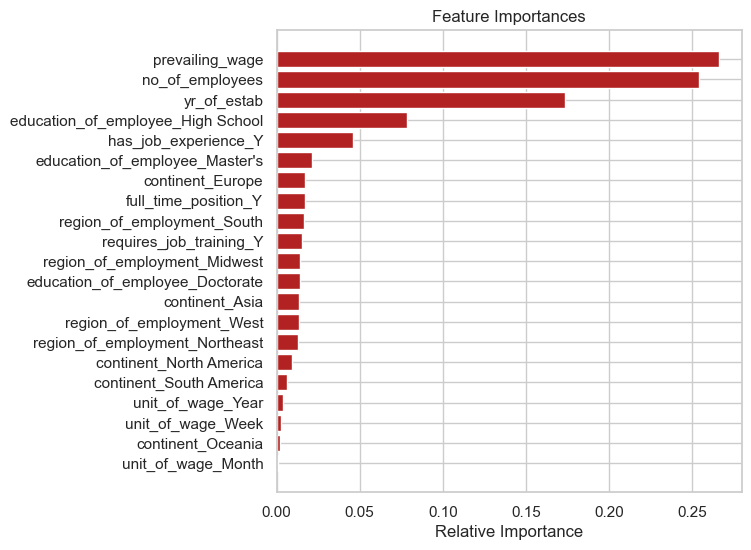

In [52]:
feature_names = X_train.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Hyperparameter Tuning - Decision Tree**

In [54]:
from sklearn import metrics
# classifier
dt_tuned = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

,Accuracy,Recall,Precision,F1
0,0.71255,0.93192,0.72007,0.81241


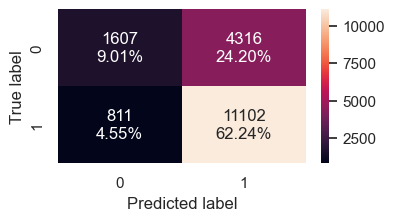

In [55]:
# Confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(dt_tuned, X_train, y_train)

# Check performance for train data on tuned estimator
dt_tuned_perf_train = model_performance_classification_sklearn(
    dt_tuned, X_train, y_train
)
dt_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.70657,0.93085,0.71545,0.80906


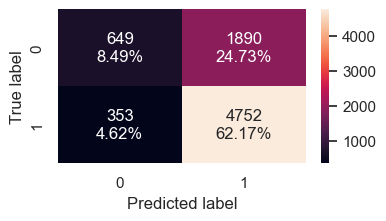

In [56]:
# Create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(dt_tuned, X_test, y_test)

# Check performance for test data on tuned estimator
dt_tuned_perf_test = model_performance_classification_sklearn(
    dt_tuned, X_test, y_test
)
dt_tuned_perf_test

**Bagging - Model Building and Hyperparameter Tuning**

In [58]:
from sklearn.ensemble import BaggingClassifier
# Define bagging classifier with random state = 1
bc = BaggingClassifier(random_state=1)

# Fit bagging classifier on the train data
bc.fit(X_train, y_train)

BaggingClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
0,0.98520,0.98598,0.99181,0.98889


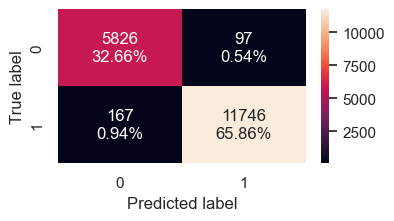

In [59]:
# Create confusion matrix for train data
confusion_matrix_sklearn(bc, X_train, y_train)

# Check performance on train data
bc_perf_train = model_performance_classification_sklearn(
    bc, X_train, y_train
)
bc_perf_train

,Accuracy,Recall,Precision,F1
0,0.69152,0.76415,0.77171,0.76791


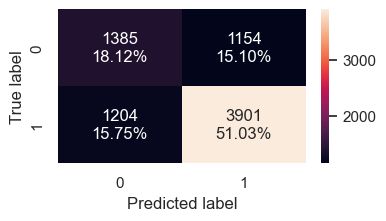

In [60]:
# Create confusion matrix for test data
confusion_matrix_sklearn(bc, X_test, y_test)

# Check performance for test data
bc_perf_test = model_performance_classification_sklearn(
    bc, X_test, y_test
)
bc_perf_test

**Hyperparameter Tuning - Bagging Classifier**

In [61]:
# Choose the type of classifier.
bc_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5, 0.7, 1],
    "n_estimators": np.arange(50, 110, 25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
bc_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

,Accuracy,Recall,Precision,F1
0,0.99619,0.99992,0.99441,0.99715


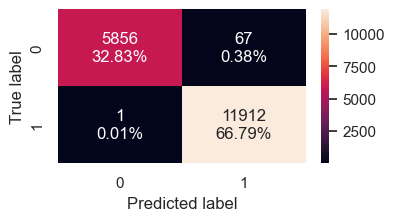

In [62]:
# Create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(bc_tuned, X_train, y_train)

# Check performance for train data on tuned estimator
bc_tuned_perf_train = model_performance_classification_sklearn(
    bc_tuned, X_train, y_train
)
bc_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.72423,0.89540,0.74386,0.81262


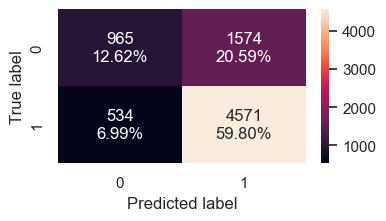

In [63]:
# Create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bc_tuned, X_test, y_test)

# Check performance for test data on tuned estimator
bc_tuned_perf_test = model_performance_classification_sklearn(
    bc_tuned, X_test, y_test
)
bc_tuned_perf_test

**Random Forest-**

In [65]:
from sklearn.ensemble import RandomForestClassifier
# Define random forest with random state = 1 and class_weight = balanced
rf = RandomForestClassifier(random_state=1, class_weight="balanced")

# Fit random forest on the train data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


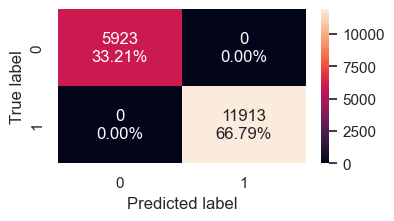

In [66]:
# Create confusion matrix for train data
confusion_matrix_sklearn(rf, X_train, y_train)

#check performance on train data
rf_perf_train = model_performance_classification_sklearn(
    rf, X_train, y_train
)
rf_perf_train

,Accuracy,Recall,Precision,F1
0,0.72737,0.84721,0.76834,0.80585


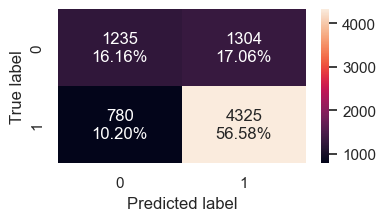

In [67]:
# Create confusion matrix for test data
confusion_matrix_sklearn(rf, X_test, y_test)

# Check performance for test data
rf_perf_test = model_performance_classification_sklearn(
    rf, X_test, y_test
)
rf_perf_test

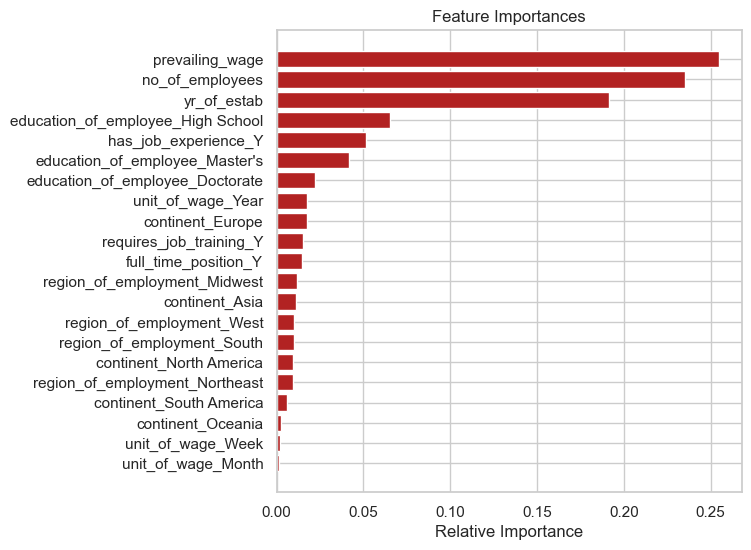

In [68]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [69]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True, verbose=0)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(20, 100, 20),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1,verbose=0)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=80,
                       oob_score=True, random_state=1)

,Accuracy,Recall,Precision,F1
0,0.77377,0.90649,0.78710,0.84259


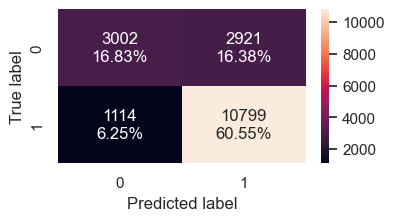

In [70]:
# Create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

# Check performance for train data on tuned estimator
rf_tuned_perf_train = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.74424,0.88619,0.76704,0.82232


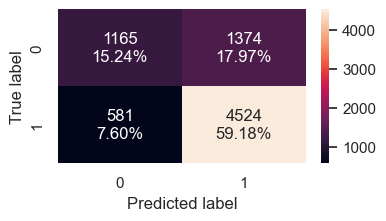

In [71]:
# Create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

# Check performance for test data on tuned estimator
rf_tuned_perf_test = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_perf_test

**Boosting - Model Building and Hyperparameter Tuning-**

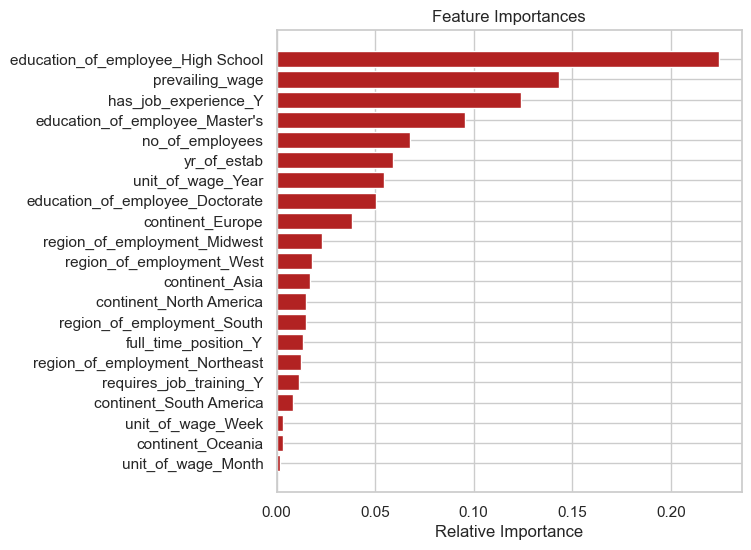

In [72]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [75]:
from sklearn.ensemble import AdaBoostClassifier
# Define AdaBoost Classifier with random state = 1
ab = AdaBoostClassifier(random_state=1)

# Fit AdaBoost Classifier on the train data
ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
0,0.73823,0.88718,0.76069,0.81908


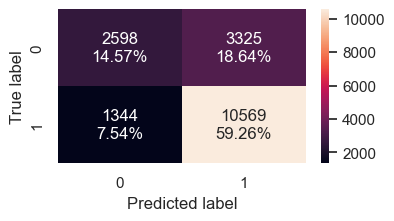

In [76]:
# Create confusion matrix for train data
confusion_matrix_sklearn(ab, X_train, y_train)

# Check performance on train data
ab_perf_train = model_performance_classification_sklearn(
    ab, X_train, y_train
)
ab_perf_train

,Accuracy,Recall,Precision,F1
0,0.73430,0.88501,0.75780,0.81648


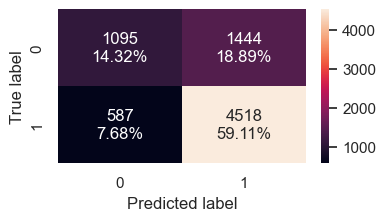

In [77]:
# Create confusion matrix for test data
confusion_matrix_sklearn(ab, X_test, y_test)

#  Check performance for test data
ab_perf_test = model_performance_classification_sklearn(
    ab, X_test, y_test
)
ab_perf_test

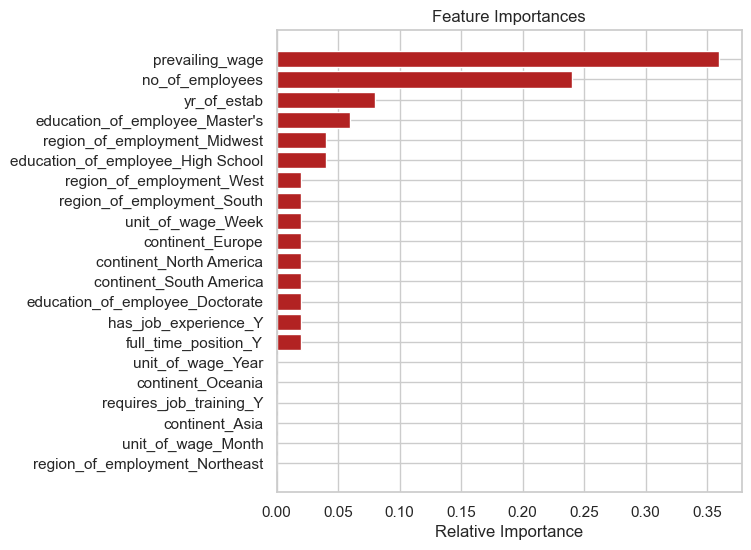

In [78]:
feature_names = X_train.columns
importances = ab.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Choose the type of classifier
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": np.arange(0.01, 0.1, 0.05),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=ab_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
ab_tuned.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

,Accuracy,Recall,Precision,F1
0,0.75443,0.88391,0.77844,0.82783


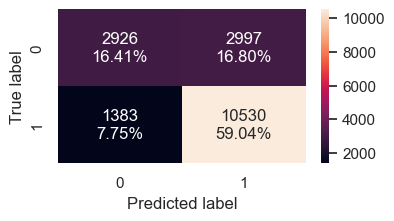

In [82]:
# Create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(ab_tuned, X_train, y_train)

# Check performance for train data on tuned estimator
ab_tuned_perf_train = model_performance_classification_sklearn(
    ab_tuned, X_train, y_train
)
ab_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.74110,0.87600,0.76865,0.81882


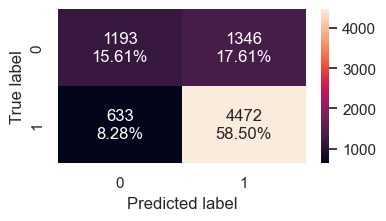

In [83]:
# Create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(ab_tuned, X_test, y_test)

# Check performance for test data on tuned estimator
ab_tuned_perf_test = model_performance_classification_sklearn(
    ab_tuned, X_test, y_test
)
ab_tuned_perf_test

**Gradient Boosting Classifier**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
# Define Gradient Boosting Classifier with random state = 1
gb = GradientBoostingClassifier(random_state=1)
# Fit Gradient Boosting Classifier on the train data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
0,0.75880,0.88374,0.78304,0.83035


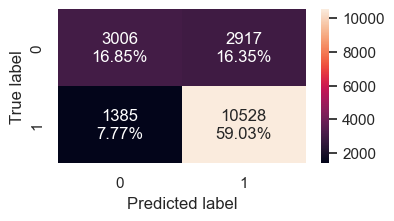

In [86]:
# Confusion matrix for train data
confusion_matrix_sklearn(gb, X_train, y_train)

# Check performance on train data
gb_perf_train = model_performance_classification_sklearn(
    gb, X_train, y_train
)
gb_perf_train

,Accuracy,Recall,Precision,F1
0,0.74477,0.87600,0.77237,0.82093


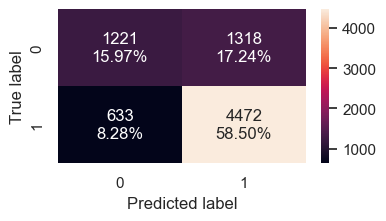

In [87]:
# Create confusion matrix for test data
confusion_matrix_sklearn(gb, X_test, y_test)

# Check performance for test data
gb_perf_test = model_performance_classification_sklearn(
    gb, X_test, y_test
)
gb_perf_test

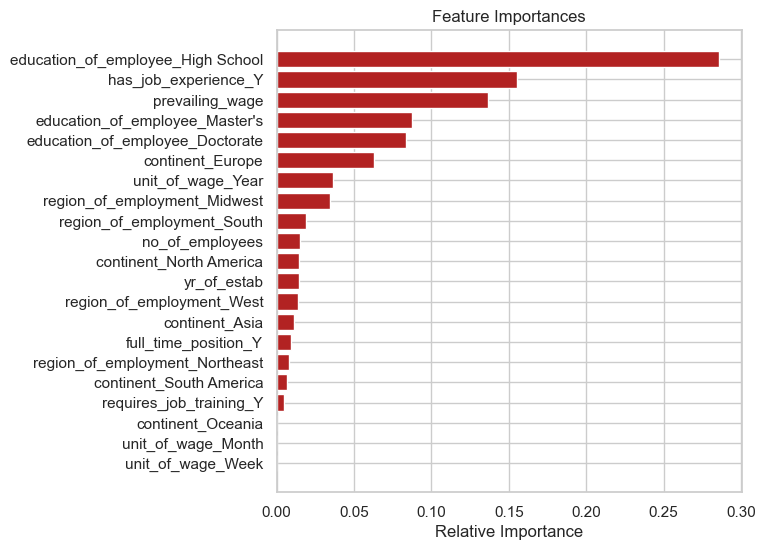

In [88]:
feature_names = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color= "firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [89]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=50, random_state=1,
                           subsample=0.9)

,Accuracy,Recall,Precision,F1
0,0.75617,0.88525,0.77957,0.82906


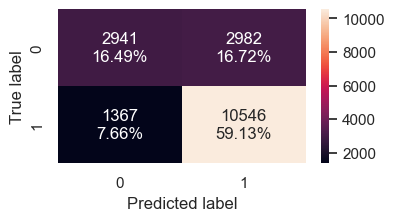

In [90]:
# Confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(gb_tuned, X_train, y_train)

# Check performance for train data on tuned estimator
gb_tuned_perf_train = model_performance_classification_sklearn(
    gb_tuned, X_train, y_train
)
gb_tuned_perf_train


,Accuracy,Recall,Precision,F1
0,0.74372,0.87875,0.77000,0.82078


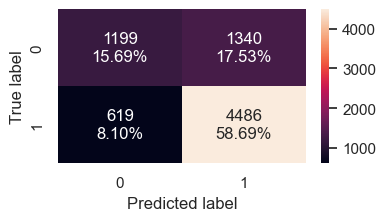

In [91]:
# Create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

# Check performance for test data on tuned estimator
gb_tuned_perf_test = model_performance_classification_sklearn(
    gb_tuned, X_test, y_test
)
gb_tuned_perf_test

**XGBoost Classifier**

In [92]:
# Define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb = XGBClassifier(random_state=1, eval_metric="logloss")

# Fit XGBoost Classifier on the train data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

,Accuracy,Recall,Precision,F1
0,0.85081,0.93595,0.85454,0.89339


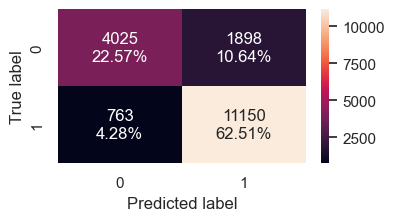

In [93]:
# Create confusion matrix for train data
confusion_matrix_sklearn(xgb, X_train, y_train)

# Check performance on train data
xgb_perf_train = model_performance_classification_sklearn(
    xgb, X_train, y_train
)
xgb_perf_train

,Accuracy,Recall,Precision,F1
0,0.72998,0.85152,0.76897,0.80814


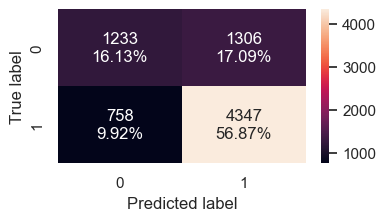

In [94]:
# Create confusion matrix for test data
confusion_matrix_sklearn(xgb, X_test, y_test)

# Check performance for test data
xgb_perf_test = model_performance_classification_sklearn(
    xgb, X_test, y_test
)
xgb_perf_test

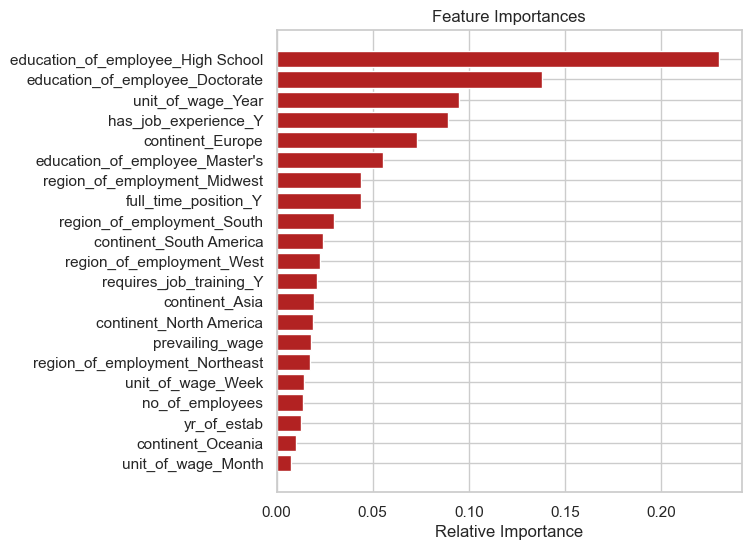

In [95]:
feature_names = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [96]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

,Accuracy,Recall,Precision,F1
0,0.76239,0.88743,0.78491,0.83303


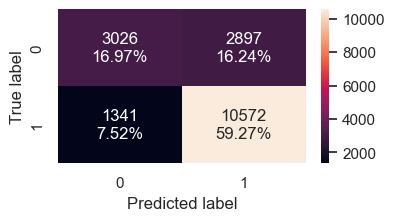

In [97]:
# Create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

# Check performance for train data on tuned estimator
xgb_tuned_perf_train = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.74477,0.87522,0.77274,0.82080


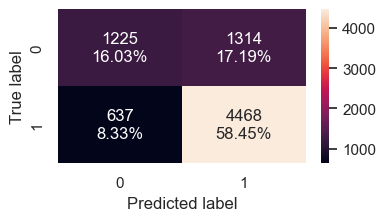

In [98]:
# Create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

# Check performance for test data on tuned estimator
xgb_tuned_perf_test = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_perf_test

**Stacking Classifier**

In [100]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ("Bagging Classifier",bc_tuned ),
    ("AdaBoost", ab_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb

# Define Stacking Classifier
stacking = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

# Fit Stacking Classifier on the train data
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging Classifier',
                                BaggingClassifier(max_features=0.7,
                                                  max_samples=0.7,
                                                  n_estimators=100,
                                                  random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                                    random_state=1),
                                                   learning_rate=0.060000000000000005,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

,Accuracy,Recall,Precision,F1
0,0.74507,0.86435,0.77842,0.81914


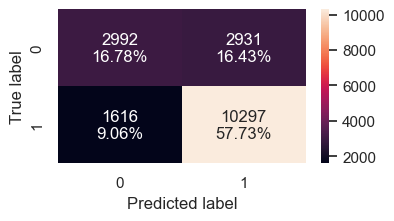

In [101]:
# Create confusion matrix for train data
confusion_matrix_sklearn(stacking, X_train, y_train)

# Check performance on train data
stacking_perf_train = model_performance_classification_sklearn(
    stacking, X_train, y_train
)
stacking_perf_train

,Accuracy,Recall,Precision,F1
0,0.73600,0.86758,0.76746,0.81445


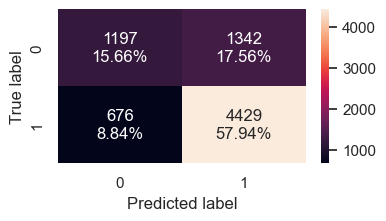

In [102]:
# Create confusion matrix for test data
confusion_matrix_sklearn(stacking, X_test, y_test)

# Check performance for test data
stacking_perf_test = model_performance_classification_sklearn(
    stacking, X_test, y_test
)
stacking_perf_test

In [103]:
estimators = [
    ("XGBoost",xgb ),
    ("AdaBoost", ab_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = bc_tuned

# Define Stacking Classifier
stacking2 = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

# Fit Stacking Classifier on the train data
stacking2.fit(X_train, y_train)

StackingClassifier(estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,...
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                                    random_state=1),
                                                   learning_rate=0.060000000000000005,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=80,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=BaggingClassifier(max_features=0.7,
                                                     max_samples=0.7,
                                                     n_estimators=100,
                                                     random_state=1))

,Accuracy,Recall,Precision,F1
0,0.76205,0.87115,0.79300,0.83024


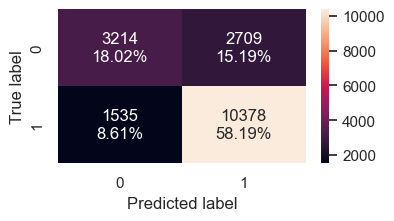

In [104]:
# Create confusion matrix for train data
confusion_matrix_sklearn(stacking2, X_train, y_train)

# Check performance on train data
stacking2_perf_train = model_performance_classification_sklearn(
    stacking2, X_train, y_train
)
stacking2_perf_train

,Accuracy,Recall,Precision,F1
0,0.73038,0.85328,0.76853,0.80869


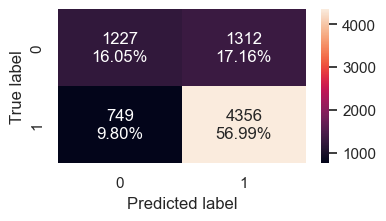

In [105]:
# Create confusion matrix for test data
confusion_matrix_sklearn(stacking2, X_test, y_test)

# Check performance for test data
stacking2_perf_test = model_performance_classification_sklearn(
    stacking2, X_test, y_test
)
stacking2_perf_test

**Model Performance Comparison and Final Model Selection**

In [107]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dt_perf_train.T,
        dt_tuned_perf_train.T,
        bc_perf_train.T,
        bc_tuned_perf_train.T,
        rf_perf_train.T,
        rf_tuned_perf_train.T,
        ab_perf_train.T,
        ab_tuned_perf_train.T,
        gb_perf_train.T,
        gb_tuned_perf_train.T,
        xgb_perf_train.T,
        xgb_tuned_perf_train.T,
        stacking_perf_train.T,
        stacking2_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
     "Stacking Classifier",
    "Stacking Classifier2",
]

In [108]:
# Testing performance comparison

# Check performance for test data
models_test_comp_df = pd.concat(
    [
        dt_perf_test.T,
        dt_tuned_perf_test.T,
        bc_perf_test.T,
        bc_tuned_perf_test.T,
        rf_perf_test.T,
        rf_tuned_perf_test.T,
        ab_perf_test.T,
        ab_tuned_perf_test.T,
        gb_perf_test.T,
        gb_tuned_perf_test.T,
        xgb_perf_test.T,
        xgb_tuned_perf_test.T,
        stacking_perf_test.T,
        stacking2_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
    "Stacking Classifier2",
 ]

In [109]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier,Stacking Classifier2
Accuracy,1.00000,0.71255,0.98520,0.99619,1.00000,0.77377,0.73823,0.75443,0.75880,0.75617,0.85081,0.76239,0.74507,0.76205
Recall,1.00000,0.93192,0.98598,0.99992,1.00000,0.90649,0.88718,0.88391,0.88374,0.88525,0.93595,0.88743,0.86435,0.87115
Precision,1.00000,0.72007,0.99181,0.99441,1.00000,0.78710,0.76069,0.77844,0.78304,0.77957,0.85454,0.78491,0.77842,0.79300
F1,1.00000,0.81241,0.98889,0.99715,1.00000,0.84259,0.81908,0.82783,0.83035,0.82906,0.89339,0.83303,0.81914,0.83024


In [110]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier,Stacking Classifier2
Accuracy,0.66484,0.70657,0.69152,0.72423,0.72737,0.74424,0.73430,0.74110,0.74477,0.74372,0.72998,0.74477,0.73600,0.73038
Recall,0.74280,0.93085,0.76415,0.89540,0.84721,0.88619,0.88501,0.87600,0.87600,0.87875,0.85152,0.87522,0.86758,0.85328
Precision,0.75223,0.71545,0.77171,0.74386,0.76834,0.76704,0.75780,0.76865,0.77237,0.77000,0.76897,0.77274,0.76746,0.76853
F1,0.74749,0.80906,0.76791,0.81262,0.80585,0.82232,0.81648,0.81882,0.82093,0.82078,0.80814,0.82080,0.81445,0.80869


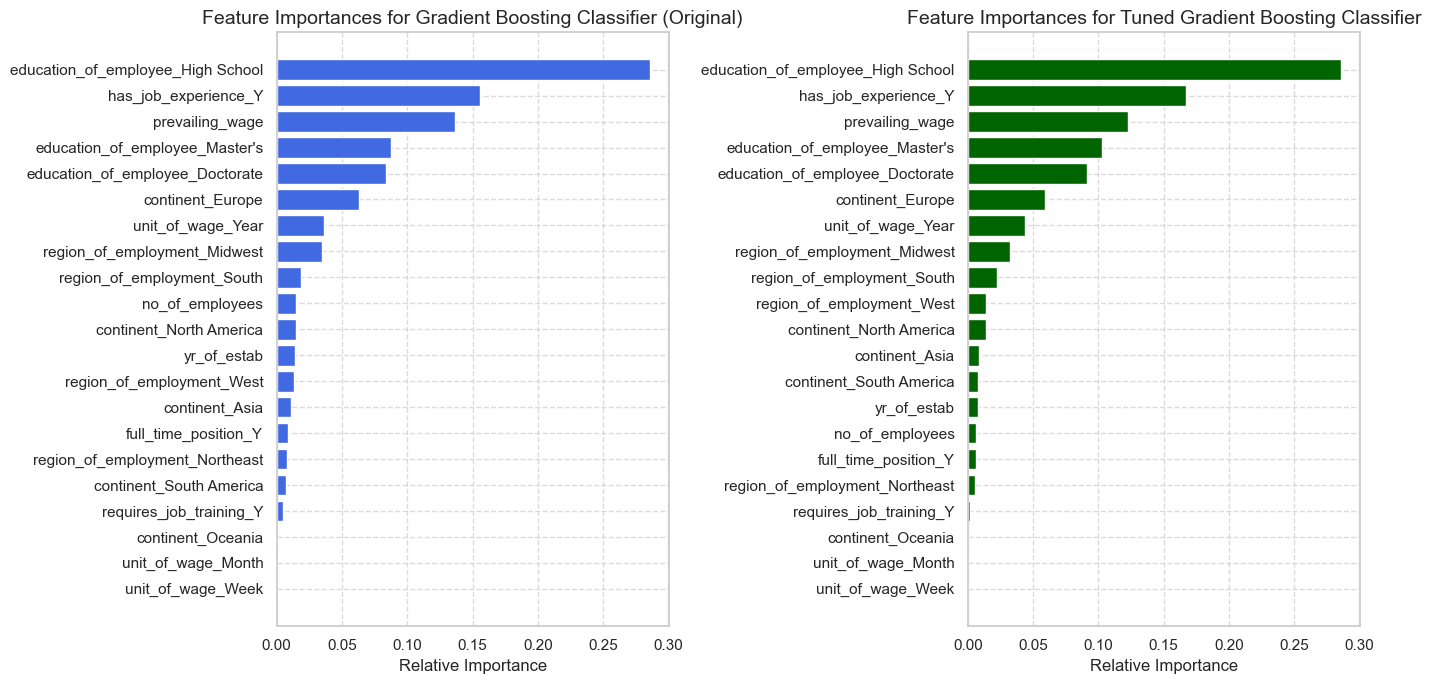

In [113]:

# Feature importances for the original Gradient Boost classifier
feature_names = X_train.columns
gb_importances = gb.feature_importances_
gb_indices = np.argsort(gb_importances)

# Feature importances for the tuned Gradient Boost classifier
gb_tuned_importances = gb_tuned.feature_importances_
gb_tuned_indices = np.argsort(gb_tuned_importances)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot for original Gradient Boost classifier
ax1.barh(range(len(gb_indices)), gb_importances[gb_indices], color="royalblue", align="center")
ax1.set_yticks(range(len(gb_indices)))
ax1.set_yticklabels([feature_names[i] for i in gb_indices])
ax1.set_xlabel("Relative Importance", fontsize=12)
ax1.set_title("Feature Importances for Gradient Boosting Classifier (Original)", fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for tuned Gradient Boost classifier
ax2.barh(range(len(gb_tuned_indices)), gb_tuned_importances[gb_tuned_indices], color="darkgreen", align="center")
ax2.set_yticks(range(len(gb_tuned_indices)))
ax2.set_yticklabels([feature_names[i] for i in gb_tuned_indices])
ax2.set_xlabel("Relative Importance", fontsize=12)
ax2.set_title("Feature Importances for Tuned Gradient Boosting Classifier", fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
